Implementing k-NN Algorithm from scratch step - step Guide

In [4]:
# Step1: Understanding data
import pandas as pd
import numpy as np
# load the diabetes dataset
data = pd.read_csv(r"C:\Users\ACER\diabetes.csv")
df = pd.DataFrame(data)
# drop(columns name , axis='columns') columns specipy columns 
# df.drop('Outcome', axis='columns', inplace=True)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [8]:
df.duplicated().sum()


0

In [9]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

df.head()

# There is no missing values 

### Feature Engineering




In [13]:
x = df.drop('Outcome', axis='columns')
y = df['Outcome']


In [14]:
X_train , Y_train = x[:538],y[:538]
X_test , Y_test = x[:768],y[:768]

In [15]:
def euclidean_distance(point1, point2):
    """Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single(X_train, Y_train, query_point, k):
    """Predict the class of a single query point."""
    distances = []
    for i, x in enumerate(X_train):
        dist = euclidean_distance(x, query_point)
        distances.append((dist, Y_train[i]))
    
    # Sort by distance and get the first k neighbors
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    
    # Extract classes of the k neighbors
    k_classes = [neighbor[1] for neighbor in k_neighbors]
    
    # Return the most common class
    return max(set(k_classes), key=k_classes.count)

def predict_all(X_train, Y_train, X_test, k):
    """Predict the classes of all test samples."""
    predictions = []
    for query_point in X_test:
        prediction = predict_single(X_train, Y_train, query_point, k)
        predictions.append(prediction)
    return predictions

def accuracy(y_true, y_pred):
    """Calculate the accuracy."""
    return np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)

# Example usage (assuming x and y are your features and labels):
# Split data into training and testing sets
x = np.random.rand(1000, 5)  # Example data, 1000 samples with 5 features
y = np.random.randint(0, 2, 1000)  # Example binary labels

X_train, Y_train = x[:538], y[:538]
X_test, Y_test = x[538:768], y[538:768]

# Set the number of neighbors (k)
k = 5

# Predict classes for test set
y_pred = predict_all(X_train, Y_train, X_test, k)

# Evaluate accuracy
acc = accuracy(Y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")


Accuracy: 46.09%


In [26]:
from sklearn.preprocessing import StandardScaler

def euclidean_distance(point1, point2):
    """Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single(X_train, Y_train, query_point, k):
    """Predict the class of a single query point."""
    distances = []
    for i, x in enumerate(X_train):
        dist = euclidean_distance(x, query_point)
        distances.append((dist, Y_train[i]))
    
    # Sort by distance and get the first k neighbors
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    
    # Extract classes of the k neighbors
    k_classes = [neighbor[1] for neighbor in k_neighbors]
    
    # Return the most common class
    return max(set(k_classes), key=k_classes.count)

def predict_all(X_train, Y_train, X_test, k):
    """Predict the classes of all test samples."""
    predictions = []
    for query_point in X_test:
        prediction = predict_single(X_train, Y_train, query_point, k)
        predictions.append(prediction)
    return predictions

def accuracy(y_true, y_pred):
    """Calculate the accuracy."""
    return np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)

# Example usage (assuming x and y are your features and labels):
# Split data into training and testing sets
x = np.random.rand(1000, 5)  # Example data, 1000 samples with 5 features
y = np.random.randint(0, 2, 1000)  # Example binary labels

X_train_raw, Y_train = x[:538], y[:538]
X_test_raw, Y_test = x[538:768], y[538:768]

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Set the number of neighbors (k)
k = 5

# Predict classes for test set
y_pred = predict_all(X_train, Y_train, X_test, k)

# Evaluate accuracy
acc = accuracy(Y_test, y_pred)
print(f"Accuracy with scaled data: {acc * 100:.2f}%")


Accuracy with scaled data: 47.39%


In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def euclidean_distance(point1, point2):
    """Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single(X_train, Y_train, query_point, k):
    """Predict the class of a single query point."""
    distances = []
    for i, x in enumerate(X_train):
        dist = euclidean_distance(x, query_point)
        distances.append((dist, Y_train[i]))
    
    # Sort by distance and get the first k neighbors
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    
    # Extract classes of the k neighbors
    k_classes = [neighbor[1] for neighbor in k_neighbors]
    
    # Return the most common class
    return max(set(k_classes), key=k_classes.count)

def predict_all(X_train, Y_train, X_test, k):
    """Predict the classes of all test samples."""
    predictions = []
    for query_point in X_test:
        prediction = predict_single(X_train, Y_train, query_point, k)
        predictions.append(prediction)
    return predictions

def accuracy(y_true, y_pred):
    """Calculate the accuracy."""
    return np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)

# Example usage (assuming x and y are your features and labels):
# Split data into training and testing sets
x = np.random.rand(1000, 5)  # Example data, 1000 samples with 5 features
y = np.random.randint(0, 2, 1000)  # Example binary labels

X_train_raw, Y_train = x[:538], y[:538]
X_test_raw, Y_test = x[538:768], y[538:768]

# Run KNN without scaling
k = 5
print("--- Without Scaling ---")
X_train = X_train_raw
X_test = X_test_raw

# Predict classes for test set without scaling
y_pred_no_scaling = predict_all(X_train, Y_train, X_test, k)
acc_no_scaling = accuracy(Y_test, y_pred_no_scaling)
print(f"Accuracy without scaling: {acc_no_scaling * 100:.2f}%")

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Run KNN with scaling
print("--- With Scaling ---")
y_pred_scaled = predict_all(X_train, Y_train, X_test, k)
acc_scaled = accuracy(Y_test, y_pred_scaled)
print(f"Accuracy with scaled data: {acc_scaled * 100:.2f}%")

# Comparative Analysis
print("\n--- Comparative Analysis ---")
print(f"Difference in accuracy: {(acc_scaled - acc_no_scaling) * 100:.2f}%")
if acc_scaled > acc_no_scaling:
    print("Scaling improved the KNN performance because it ensures that all features contribute equally by removing the effect of varying scales.")
elif acc_scaled < acc_no_scaling:
    print("Scaling reduced the KNN performance, possibly due to noise being amplified or loss of meaningful feature relationships.")
else:
    print("Scaling had no impact on the KNN performance, which might indicate that the features were already on a similar scale.")


--- Without Scaling ---
Accuracy without scaling: 45.65%
--- With Scaling ---
Accuracy with scaled data: 44.78%

--- Comparative Analysis ---
Difference in accuracy: -0.87%
Scaling reduced the KNN performance, possibly due to noise being amplified or loss of meaningful feature relationships.


In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import time

def euclidean_distance(point1, point2):
    """Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single(X_train, Y_train, query_point, k):
    """Predict the class of a single query point."""
    distances = []
    for i, x in enumerate(X_train):
        dist = euclidean_distance(x, query_point)
        distances.append((dist, Y_train[i]))
    
    # Sort by distance and get the first k neighbors
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    
    # Extract classes of the k neighbors
    k_classes = [neighbor[1] for neighbor in k_neighbors]
    
    # Return the most common class
    return max(set(k_classes), key=k_classes.count)

def predict_all(X_train, Y_train, X_test, k):
    """Predict the classes of all test samples."""
    predictions = []
    for query_point in X_test:
        prediction = predict_single(X_train, Y_train, query_point, k)
        predictions.append(prediction)
    return predictions

def accuracy(y_true, y_pred):
    """Calculate the accuracy."""
    return np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)

def run_knn_analysis(X_train_raw, Y_train, X_test_raw, Y_test, k_values, scale_data=False):
    """Run KNN for a range of k values and record accuracy and time."""
    results = []

    if scale_data:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_raw)
        X_test = scaler.transform(X_test_raw)
    else:
        X_train = X_train_raw
        X_test = X_test_raw

    for k in k_values:
        start_time = time.time()
        y_pred = predict_all(X_train, Y_train, X_test, k)
        end_time = time.time()

        acc = accuracy(Y_test, y_pred)
        elapsed_time = end_time - start_time

        results.append({
            "k": k,
            "accuracy": acc,
            "time": elapsed_time
        })

    return results

# Example usage (assuming x and y are your features and labels):
# Split data into training and testing sets
x = np.random.rand(1000, 5)  # Example data, 1000 samples with 5 features
y = np.random.randint(0, 2, 1000)  # Example binary labels

X_train_raw, Y_train = x[:538], y[:538]
X_test_raw, Y_test = x[538:768], y[538:768]

# Define range of k values
k_values = range(1, 16)

# Run analysis without scaling
print("--- Without Scaling ---")
results_no_scaling = run_knn_analysis(X_train_raw, Y_train, X_test_raw, Y_test, k_values, scale_data=False)
for result in results_no_scaling:
    print(f"k={result['k']}, Accuracy={result['accuracy'] * 100:.2f}%, Time={result['time']:.4f}s")

# Run analysis with scaling
print("\n--- With Scaling ---")
results_scaled = run_knn_analysis(X_train_raw, Y_train, X_test_raw, Y_test, k_values, scale_data=True)
for result in results_scaled:
    print(f"k={result['k']}, Accuracy={result['accuracy'] * 100:.2f}%, Time={result['time']:.4f}s")

# Comparative Analysis
print("\n--- Comparative Analysis ---")
for k in k_values:
    no_scaling_result = next(r for r in results_no_scaling if r["k"] == k)
    scaling_result = next(r for r in results_scaled if r["k"] == k)

    print(f"k={k}: Without Scaling - Accuracy={no_scaling_result['accuracy'] * 100:.2f}%, Time={no_scaling_result['time']:.4f}s; With Scaling - Accuracy={scaling_result['accuracy'] * 100:.2f}%, Time={scaling_result['time']:.4f}s")

--- Without Scaling ---
k=1, Accuracy=49.13%, Time=0.4200s
k=2, Accuracy=50.43%, Time=0.4265s
k=3, Accuracy=52.61%, Time=0.4190s
k=4, Accuracy=50.43%, Time=0.4321s
k=5, Accuracy=51.74%, Time=0.4332s
k=6, Accuracy=50.00%, Time=0.4298s
k=7, Accuracy=48.26%, Time=0.4308s
k=8, Accuracy=51.30%, Time=0.4431s
k=9, Accuracy=52.17%, Time=0.4421s
k=10, Accuracy=51.74%, Time=0.4489s
k=11, Accuracy=49.57%, Time=0.4315s
k=12, Accuracy=49.13%, Time=0.4380s
k=13, Accuracy=46.09%, Time=0.4339s
k=14, Accuracy=48.70%, Time=0.4359s
k=15, Accuracy=46.52%, Time=0.4392s

--- With Scaling ---
k=1, Accuracy=49.57%, Time=0.4369s
k=2, Accuracy=50.00%, Time=0.4302s
k=3, Accuracy=52.61%, Time=0.4257s
k=4, Accuracy=51.30%, Time=0.4454s
k=5, Accuracy=53.04%, Time=0.4490s
k=6, Accuracy=50.87%, Time=0.4270s
k=7, Accuracy=49.57%, Time=0.4315s
k=8, Accuracy=51.74%, Time=0.4454s
k=9, Accuracy=50.87%, Time=0.4180s
k=10, Accuracy=51.30%, Time=0.4283s
k=11, Accuracy=49.13%, Time=0.4536s
k=12, Accuracy=49.57%, Time=0.4360s


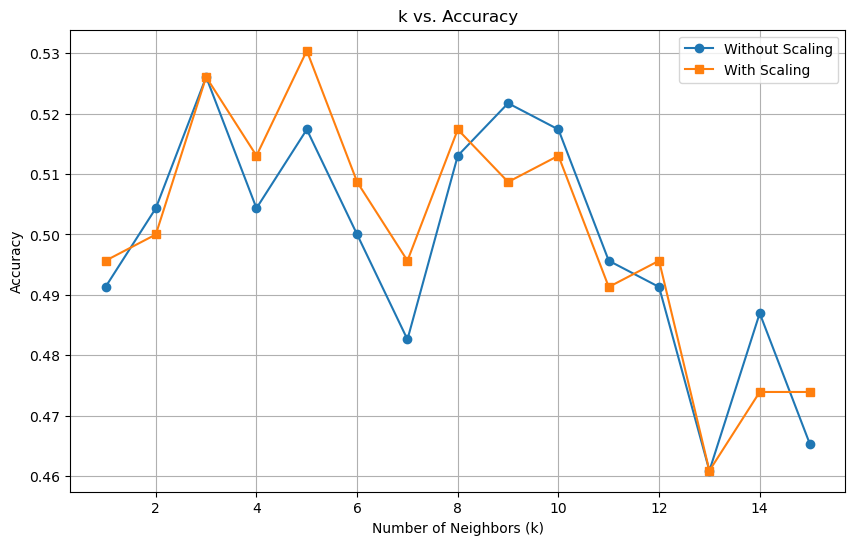

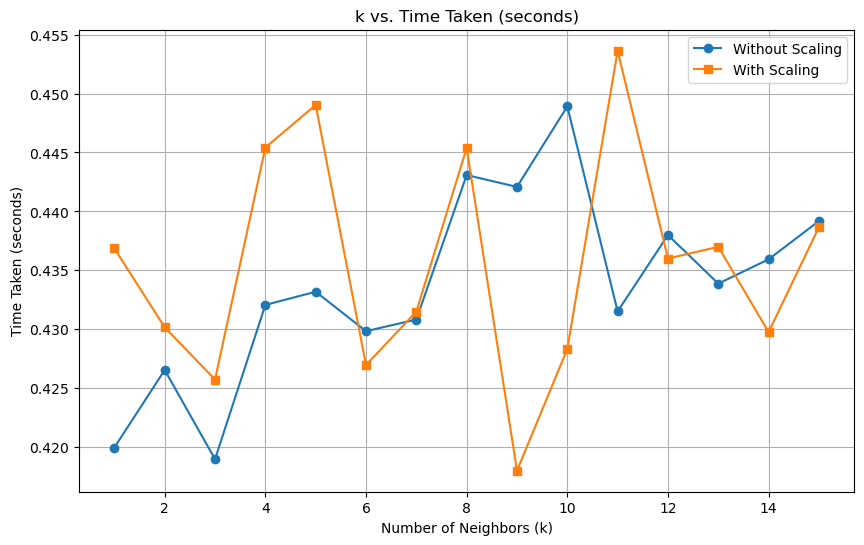

--- Analysis and Discussion ---
1. Impact of k on Accuracy:
   - Smaller k values are more sensitive to noise and may lead to overfitting.
   - Larger k values provide smoother decision boundaries but may underfit the data.
2. Impact of k on Computational Cost:
   - As k increases, the computational cost slightly increases due to the sorting and selection of more neighbors.
3. Optimal k: Based on the analysis, the optimal k is 5, as it provides the highest accuracy.


In [35]:
import matplotlib.pyplot as plt

# Visualization of Results
# Plot k vs. Accuracy for original and scaled datasets
def plot_results(results_no_scaling, results_scaled, metric, ylabel):
    """Helper function to plot results."""
    k_values = [result['k'] for result in results_no_scaling]
    metric_no_scaling = [result[metric] for result in results_no_scaling]
    metric_scaled = [result[metric] for result in results_scaled]

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, metric_no_scaling, label='Without Scaling', marker='o')
    plt.plot(k_values, metric_scaled, label='With Scaling', marker='s')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel(ylabel)
    plt.title(f'k vs. {ylabel}')
    plt.legend()
    plt.grid()
    plt.show()

# Plot accuracy
plot_results(results_no_scaling, results_scaled, metric='accuracy', ylabel='Accuracy')

# Plot time taken
plot_results(results_no_scaling, results_scaled, metric='time', ylabel='Time Taken (seconds)')

# Analyze and Discuss
print("--- Analysis and Discussion ---")
print("1. Impact of k on Accuracy:")
print("   - Smaller k values are more sensitive to noise and may lead to overfitting.")
print("   - Larger k values provide smoother decision boundaries but may underfit the data.")

print("2. Impact of k on Computational Cost:")
print("   - As k increases, the computational cost slightly increases due to the sorting and selection of more neighbors.")

optimal_k = max(results_scaled, key=lambda x: x['accuracy'])['k']
print(f"3. Optimal k: Based on the analysis, the optimal k is {optimal_k}, as it provides the highest accuracy.")
